In [1]:
from enum import Enum

In [2]:
from scipy.sparse.linalg import eigs

In [3]:
from scipy.sparse.linalg import eigsh

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib import animation

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from matplotlib.animation import PillowWriter

In [8]:
from scipy import sparse

In [9]:
from numerov2d import *

In [10]:
N = 150

In [11]:
X, Y = np.meshgrid(
        np.linspace(0, 1, N, dtype=float), 
        np.linspace(0, 1, N, dtype=float)
    )

In [12]:
V = 0 * X

In [13]:
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
V.shape

(150, 150)

In [15]:
def derivativeOperator(pointCount : int) -> np.ndarray: 
    ones : np.array = np.ones([pointCount])
    oneDimensionalDerivativeOperator = sparse.spdiags(
            np.array([ones, -2 * ones, ones]), 
            np.array([-1, 0, 1]), 
            pointCount, 
            pointCount
        )
    kineticEnegry = (-1.0 / 2.0) * sparse.kronsum(
                oneDimensionalDerivativeOperator, 
                oneDimensionalDerivativeOperator
            )
    return \
        oneDimensionalDerivativeOperator, \
        kineticEnegry 


In [16]:
def makeHamiltonian(pointCount : int, potential : np.ndarray) -> np.ndarray: 
    oneDimensionalDerivativeOperator, kineticEnergy, = derivativeOperator(pointCount)
    return kineticEnergy + potential 

In [17]:
class EigenValueTypes(Enum): 
    LARGEST_MAGNITUDE = "LM"
    SMALLEST_MAGNITUDE = "SM"
    LARGEST_ALGEBRAIC = "LA"
    SMALLEST_ALGEBRAIC = "SA"
    HALF_SPECTRUM = "BE"

In [18]:
def compute2dWaveFunction(
            pointCount : int, 
            potential : np.ndarray, 
            eigenValueType : EigenValueTypes = EigenValueTypes.SMALLEST_MAGNITUDE, 
            energyCount : int = 10
        ) -> tuple[np.array, np.ndarray]: 
    reshapedPotential = sparse.diags(potential.reshape(pointCount ** 2), (0))
    hamiltonian : np.ndarray = makeHamiltonian(pointCount, reshapedPotential)
    energies, waveFunctions = eigsh(hamiltonian, k = energyCount, which = eigenValueType.value)
    waveFunctionGrids = np.array(list(map(
            lambda transposedWaveFunction : transposedWaveFunction.reshape((pointCount, pointCount)), 
            waveFunctions.T
        )))
    return energies, waveFunctionGrids 

In [19]:
energies, waveFunctions = compute2dWaveFunction(N, V)

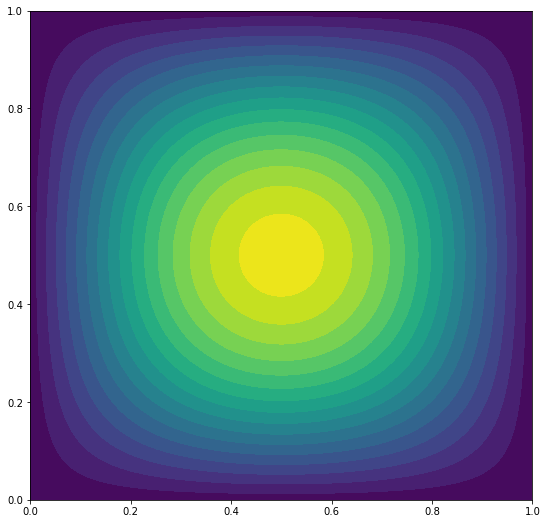

In [20]:
plt.figure(figsize=(9, 9))
plt.contourf(X, Y, waveFunctions[0], 20)

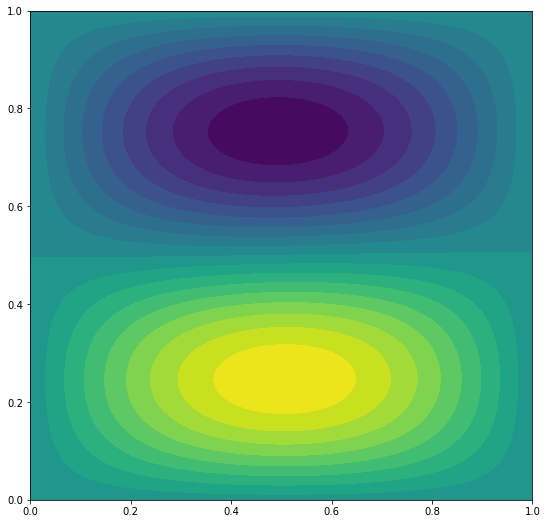

In [21]:
plt.figure(figsize=(9, 9))
plt.contourf(X, Y, waveFunctions[1], 20)

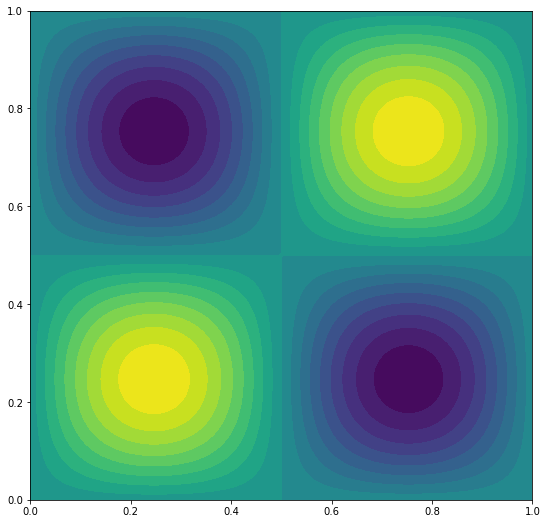

In [22]:
plt.figure(figsize=(9, 9))
plt.contourf(X, Y, waveFunctions[3], 20)